Prerequisite: This code did not make it into the report as it had misleading results when it came to the relationship between the learning rate and accuracy. It is then a test run, and for our own understanding of the problem.

Careful with the order of executing the code. Before running the logistic regression with the improved parameters from the codeblock accuracy vs. learning rate run the first code block again so the results are repriducable. Otherwise the model reuns on already "trained" data similar to a neural network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import gradient_descent as gd 
import logistic_regression as logreg

# Set the global random seed for reproducibility
np.random.seed(2024)

# Load the dataset
df = pd.read_csv("diabetes_preprocessed.csv")

# Separate features and target variable
X = df.drop(columns="Outcome").values  # 'Outcome' is the target variable; dont take it as an input
y = df["Outcome"].values

# Add an intercept term to X
X = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones for the intercept

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Initialize model parameters
initial_beta = np.zeros(X_train.shape[1])

c:\Users\justi\OneDrive\Dokumenter\GitHub\ML24UiO\Project3\Sourcecode\logistic_regression.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


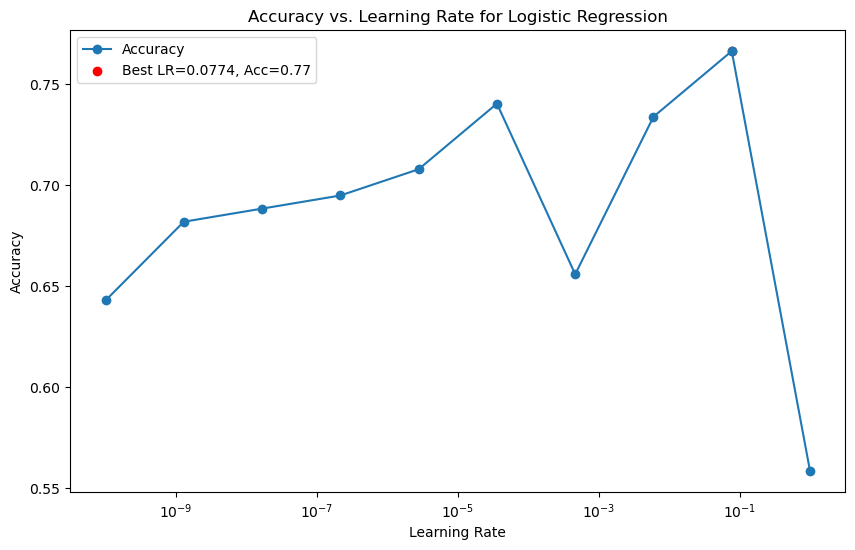

In [2]:
### Accuracy vs Learning rate ###

# Define a range of learning rates to test
learning_rates = np.logspace(-10, 0, 10)  # from 0.0001 to 1
n_iterations = 50000  # Number of epochs
batch_size = 30
lmbda = 0.01
accuracies = []

best_accuracy = 0
best_learning_rate = 0

# Loop through learning rates, train the model, and calculate accuracy
for lr in learning_rates:
    initial_beta = np.zeros(X_train.shape[1])
    beta_gd = gd.stochastic_gradient_descent(
        X_train, y_train, initial_beta,
        learning_rate=lr,
        n_iterations=n_iterations,
        model=logreg.logistic_gradient,
        batch_size=batch_size,
        lmbda=lmbda,
        momentum=True
    )
    y_pred_test = logreg.predict(X_test, beta_gd)
    accuracy = logreg.calculate_accuracy(y_test, y_pred_test)
    accuracies.append(accuracy)

    # Update the best accuracy and learning rate if this is the highest so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = lr

# Plot accuracy against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o', label='Accuracy')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate for Logistic Regression')

# Mark the best accuracy point on the plot
plt.scatter([best_learning_rate], [best_accuracy], color='red', label=f'Best LR={best_learning_rate:.4f}, Acc={best_accuracy:.2f}')
plt.legend()
plt.show()


Accuracy on the test set: 75.32%
Accuracy on the training set: 73.94%


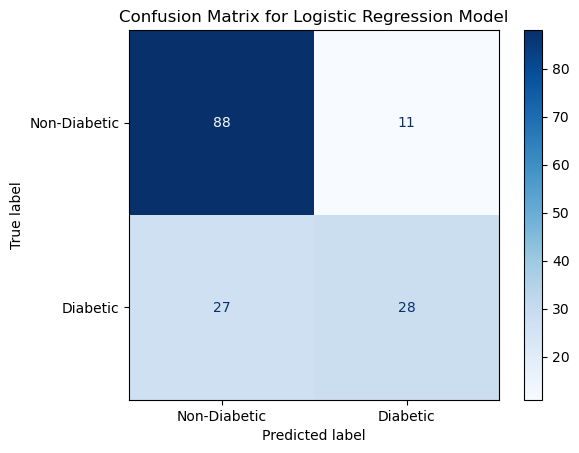

c:\Users\justi\OneDrive\Dokumenter\GitHub\ML24UiO\Project3\Sourcecode\logistic_regression.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


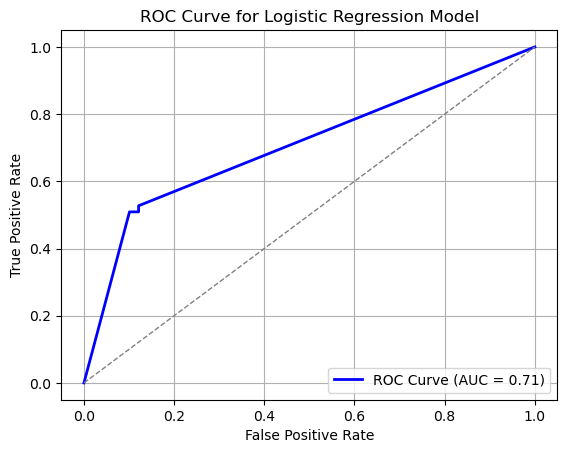

In [3]:
# Gradient Descent Parameters
learning_rate = 1
n_iterations = 50000  # Number of epochs
batch_size = 30
lmbda = 0.01

# Train the logistic regression model using your SGD function
#initial_beta = np.zeros(X_train.shape[1])
beta_gd = gd.stochastic_gradient_descent(
    X_train, y_train, initial_beta,
    learning_rate=learning_rate,
    n_iterations=n_iterations,
    model=logreg.logistic_gradient,  # Use the logistic gradient function
    batch_size=batch_size,
    lmbda=lmbda,
    momentum=True
)

# Generate predictions for the test data
y_pred_test = logreg.predict(X_test, beta_gd)

# Calculate and print the accuracy on the test set
test_accuracy = logreg.calculate_accuracy(y_test, y_pred_test)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Calculate and print the accuracy on the training set as well
y_pred_train = logreg.predict(X_train, beta_gd)
train_accuracy = logreg.calculate_accuracy(y_train, y_pred_train)
print(f"Accuracy on the training set: {train_accuracy * 100:.2f}%")

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

# ROC AUC Plot
# Use predicted probabilities for the positive class (1)
y_pred_prob_test = logreg.sigmoid(np.dot(X_test, beta_gd))

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [4]:
### Scikit-Learn Logistic regression ###

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate and fit the Scikit-Learn logistic regression model
scikit_log_reg = LogisticRegression(penalty='l2', C=1/lmbda, solver='lbfgs', max_iter=1000)
scikit_log_reg.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_scikit_test = scikit_log_reg.predict(X_test)

# Calculate accuracy on the test set
accuracy_scikit_test = accuracy_score(y_test, y_pred_scikit_test)

# Print results
print(f"Scikit-Learn Logistic Regression coefficients: {scikit_log_reg.coef_}")
print(f"Scikit-Learn Logistic Regression intercept: {scikit_log_reg.intercept_}")
print(f"Scikit-Learn Logistic Regression test accuracy: {accuracy_scikit_test * 100:.2f}%")


Scikit-Learn Logistic Regression coefficients: [[-4.34788169e+00  1.28528028e-01  3.48943639e-02 -9.05835173e-03
  -4.55928846e-03 -3.65947956e-04  9.90934494e-02  5.51698834e-01
   1.31458655e-02]]
Scikit-Learn Logistic Regression intercept: [-4.35232315]
Scikit-Learn Logistic Regression test accuracy: 75.97%


The following code using XGBoost is something we played around with, but we ended up not using this in our report.

Accuracy on the test set: 78.57%


c:\Users\justi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


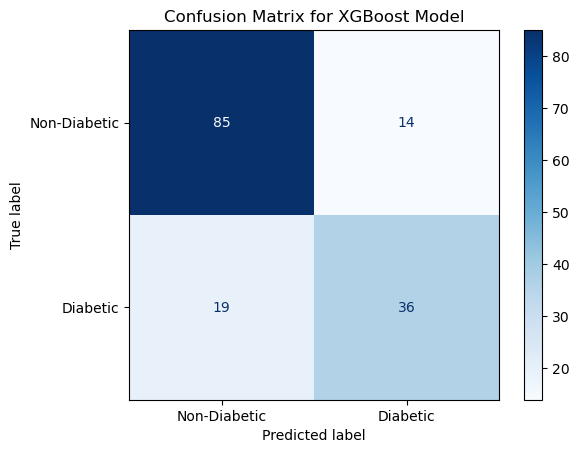

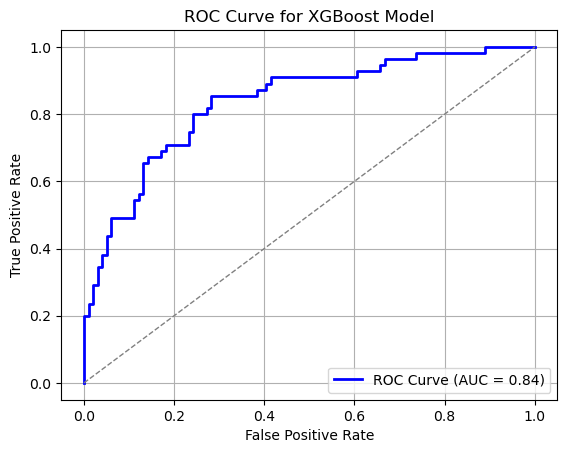

In [5]:
### XGB Boost ###

from xgboost import XGBClassifier

# Train an XGBoost Classifier
xgb_model = XGBClassifier(
    objective="binary:logistic",
    learning_rate=0.1,    # Try different values, e.g., 0.01, 0.1, 0.2
    n_estimators=100,     # Number of boosting rounds
    max_depth=3,          # Depth of each tree
    random_state=2024,    # Ensure reproducibility
    use_label_encoder=False  # Avoid warnings
)
xgb_model.fit(X_train, y_train)

# Generate predictions
y_pred_test = xgb_model.predict(X_test)
y_pred_prob_test = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluate the model
test_accuracy = logreg.calculate_accuracy(y_test, y_pred_test)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

# ROC AUC Plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()